### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import eda_helper_functions as ehf
from sklearn.ensemble import IsolationForest

### 2. Read the training data

In [2]:
train = pd.read_csv(r"C:\Users\gyash\Desktop\campusX\PROJECT\Sagemaker Flight Price Predictor\Dataset\train_data.csv")

In [3]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-27,Delhi,Cochin,20:55:00,12:35:00,940,1,In-flight meal not included,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,18:55:00,16:20:00,1285,1,No info,13044
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,1420,2,No info,10975
3,Indigo,2019-06-03,Mumbai,Hyderabad,21:20:00,22:50:00,90,0,No info,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,02:55:00,04:20:00,85,0,No info,5678


### 2.1. Fixing the Datatypes

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          6694 non-null   object
 1   date_of_journey  6694 non-null   object
 2   source           6694 non-null   object
 3   destination      6694 non-null   object
 4   dep_time         6694 non-null   object
 5   arrival_time     6694 non-null   object
 6   duration         6694 non-null   int64 
 7   total_stops      6694 non-null   int64 
 8   additional_info  6694 non-null   object
 9   price            6694 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 523.1+ KB


In [5]:
train = train.assign(
    **{
        col : pd.to_datetime(train.loc[:,col],dayfirst = True,format = 'mixed')
        for col in ['date_of_journey','dep_time','arrival_time']
    }
)

#### 3. High Level Summary

In [6]:
train.describe(include = 'number')

,duration,total_stops,price
count,6694.000000,6694.000000,6694.000000
mean,637.633702,0.812668,9092.553331
std,504.395941,0.658143,4670.489223
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5277.000000
50%,515.000000,1.000000,8372.000000
75%,925.000000,1.000000,12373.000000
max,2860.000000,3.000000,79512.000000


In [7]:
(
train
.assign(total_stops = train.total_stops.astype(object))
.describe(include = 'object')
)

,airline,source,destination,total_stops,additional_info
count,6694,6694,6694,6694,6694
unique,9,5,6,4,9
top,Jet Airways,Delhi,Cochin,1,No info
freq,2387,2781,2781,3638,5225


### 4. High level analysis of Missing Values

In [8]:
ehf.missing_info(train)

,count,percentage
variable,,


### 5. High level analysis of Outlier

In [9]:
forest = IsolationForest(n_estimators = 10,random_state = 42)

In [10]:
(
    train
    .assign(
        outlier = forest.fit_predict(
            train
            .drop(columns = ['price'])
            .select_dtypes(include='number')
        )
    )
    .query('outlier == 1')
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-05-27,Delhi,Cochin,2024-07-09 20:55:00,2024-07-09 12:35:00,940,1,In-flight meal not included,12898,1
5,Air India,2019-06-06,Delhi,Cochin,2024-07-09 10:00:00,2024-07-09 19:15:00,555,1,No info,9194,1
6,Indigo,2019-05-09,Delhi,Cochin,2024-07-09 11:25:00,2024-07-09 01:30:00,845,1,No info,8330,1
11,Goair,2019-03-24,Banglore,New Delhi,2024-07-09 11:40:00,2024-07-09 14:35:00,175,0,No info,4340,1
13,Indigo,2019-03-27,Delhi,Cochin,2024-07-09 11:30:00,2024-07-09 21:00:00,570,1,No info,6416,1
...,...,...,...,...,...,...,...,...,...,...,...
6688,Multiple Carriers,2019-05-18,Delhi,Cochin,2024-07-09 07:30:00,2024-07-09 19:15:00,705,1,No info,7564,1
6689,Spicejet,2019-06-09,Kolkata,Banglore,2024-07-09 11:35:00,2024-07-09 18:50:00,435,1,No info,8479,1
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,2024-07-09 10:00:00,2024-07-09 01:30:00,930,1,No info,15078,1
6692,Air Asia,2019-05-18,Delhi,Cochin,2024-07-09 07:55:00,2024-07-09 13:25:00,330,1,No info,8759,1


###  6. Pair Plotes


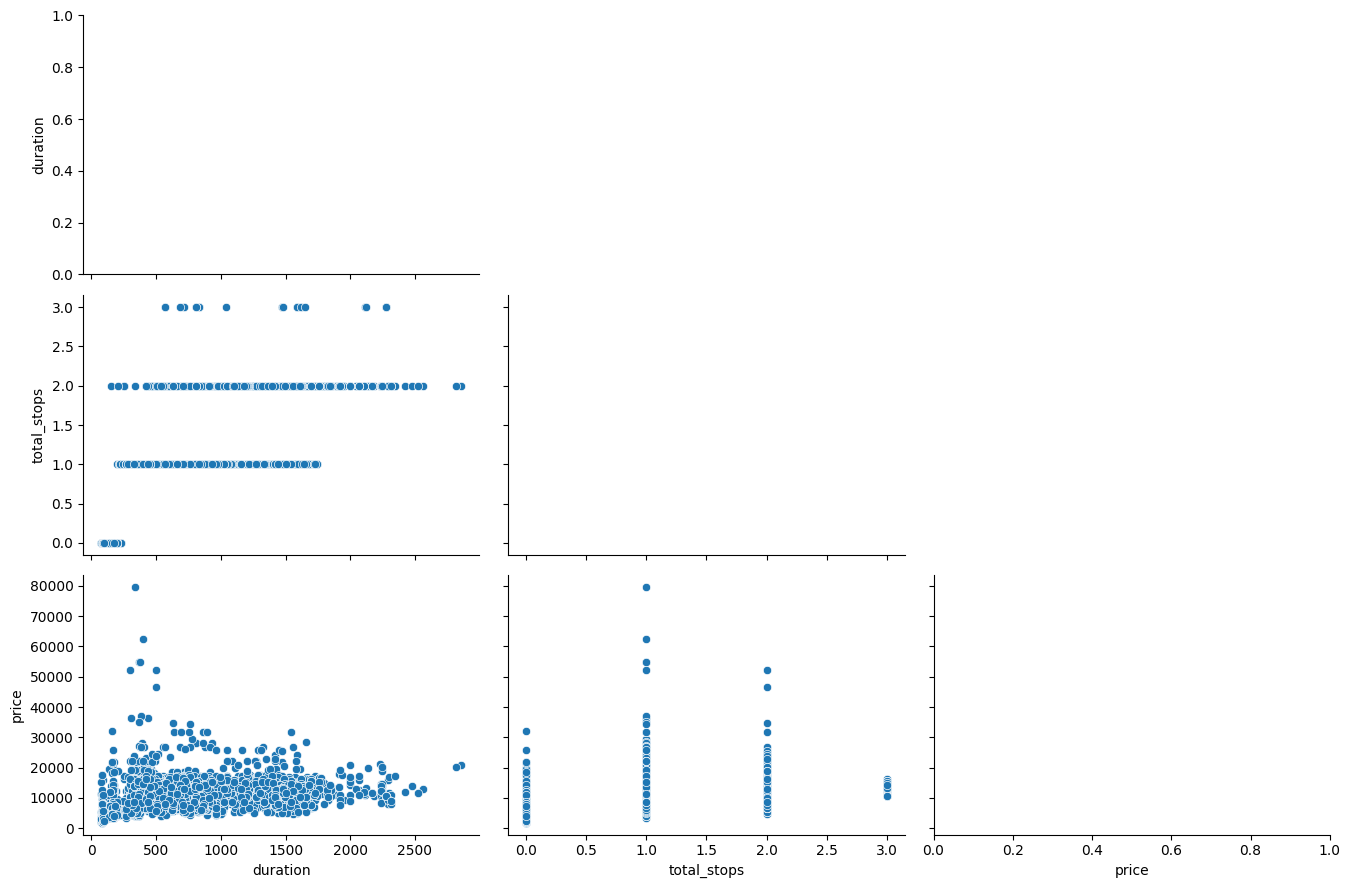

In [11]:
ehf.pair_plots(train)

### 7. Correlation Analysis

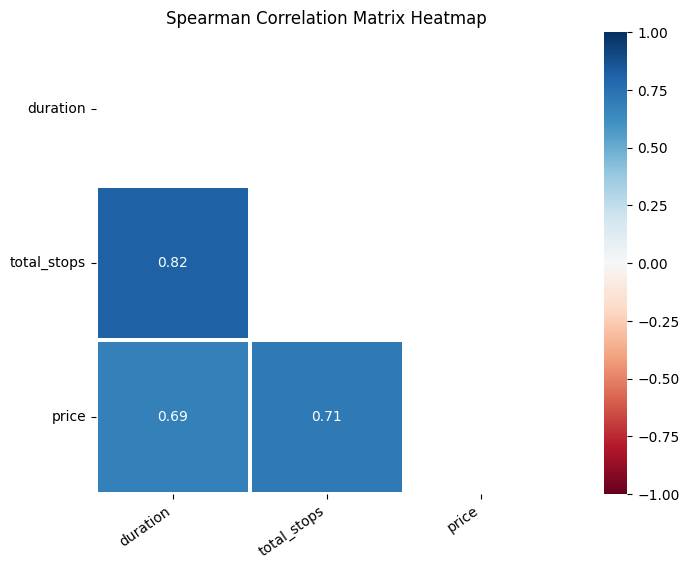

In [12]:
ehf.correlation_heatmap(train)

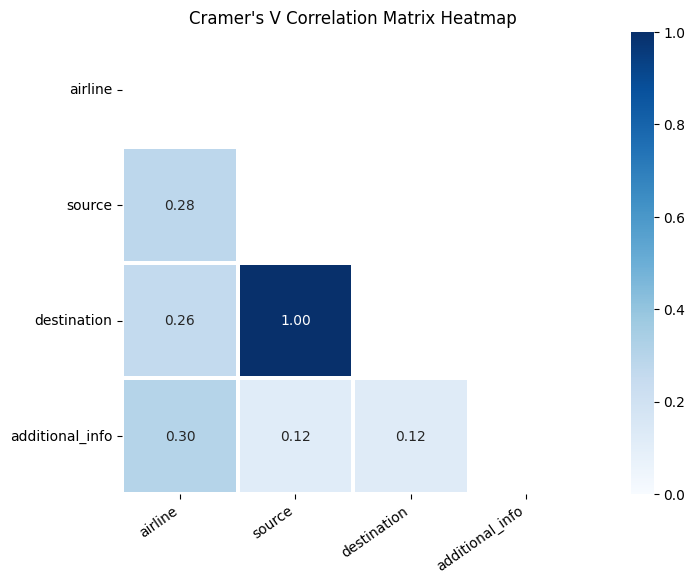

In [13]:
ehf.cramersV_heatmap(train)

### 8. Detailed Analysis

In [14]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [15]:
train.airline

0             Jet Airways
1             Jet Airways
2               Air India
3                  Indigo
4             Jet Airways
              ...        
6689             Spicejet
6690    Multiple Carriers
6691            Air India
6692             Air Asia
6693    Multiple Carriers
Name: airline, Length: 6694, dtype: object

In [16]:
ehf.cat_summary(train,'airline')

0             Jet Airways
1             Jet Airways
2               Air India
3                  Indigo
4             Jet Airways
              ...        
6689             Spicejet
6690    Multiple Carriers
6691            Air India
6692             Air Asia
6693    Multiple Carriers
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2387


,count,percentage
category,,
Jet Airways,2387,0.356588
Indigo,1281,0.191365
Air India,1087,0.162384
Multiple Carriers,768,0.114730
Spicejet,534,0.079773
Vistara,301,0.044966
Air Asia,215,0.032118
Goair,120,0.017927
Trujet,1,0.000149


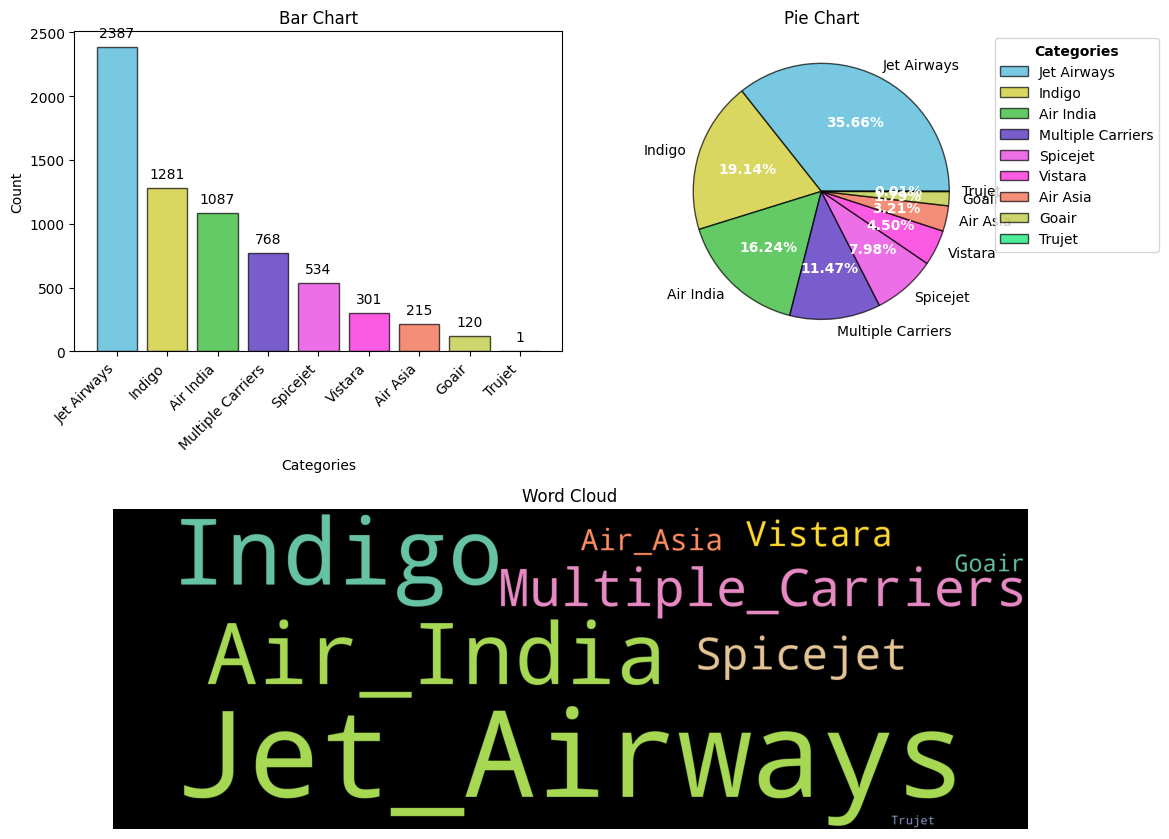

In [17]:
ehf.cat_univar_plots(train,'airline')

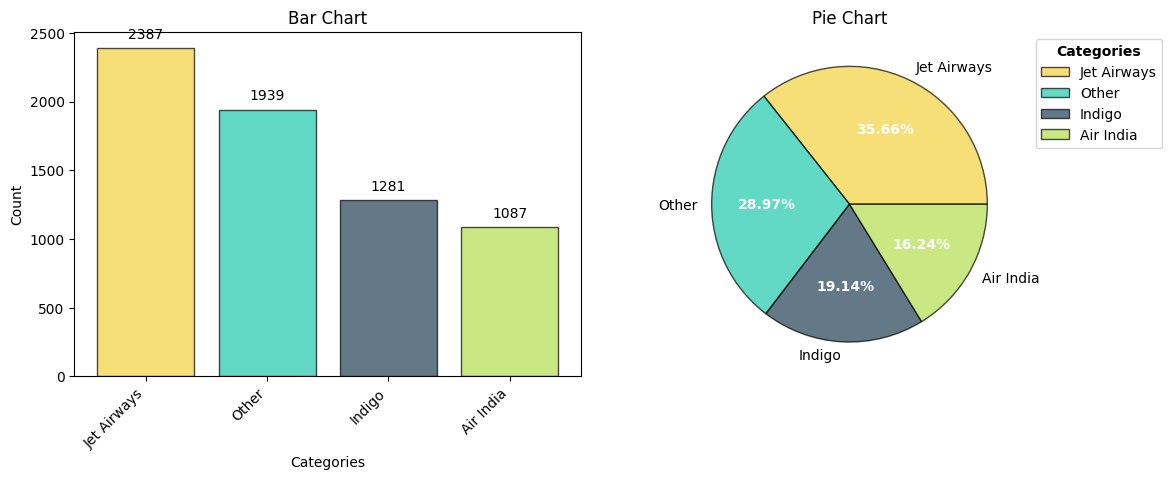

In [18]:
ehf.cat_univar_plots(train,'airline',k = 3,show_wordcloud = False)

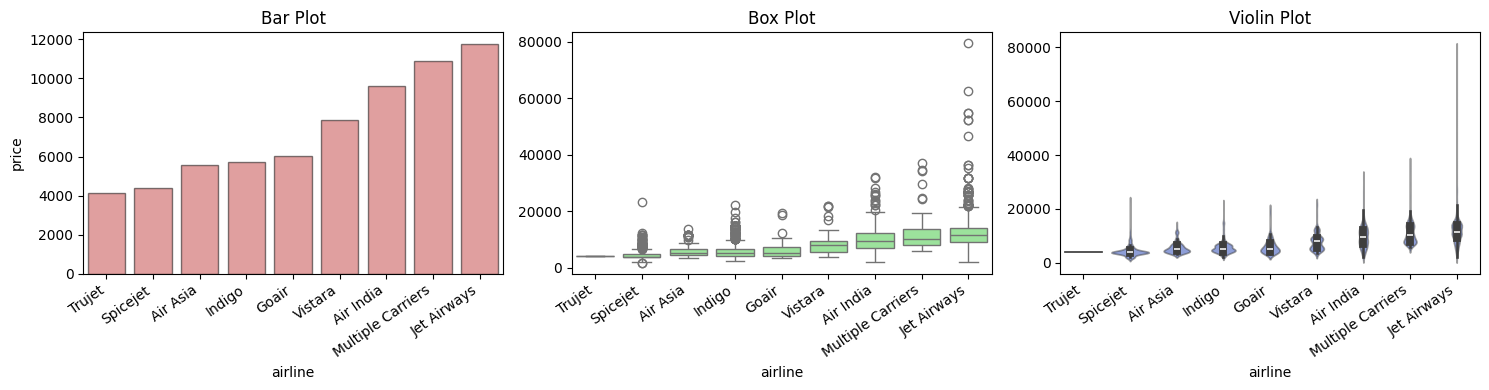

In [19]:
ehf.num_cat_bivar_plots(train,num_var = 'price',cat_var = 'airline')

In [20]:
ehf.num_cat_hyp_testing(train,'price','airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 446.0707433362749
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3062.6099595740966
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


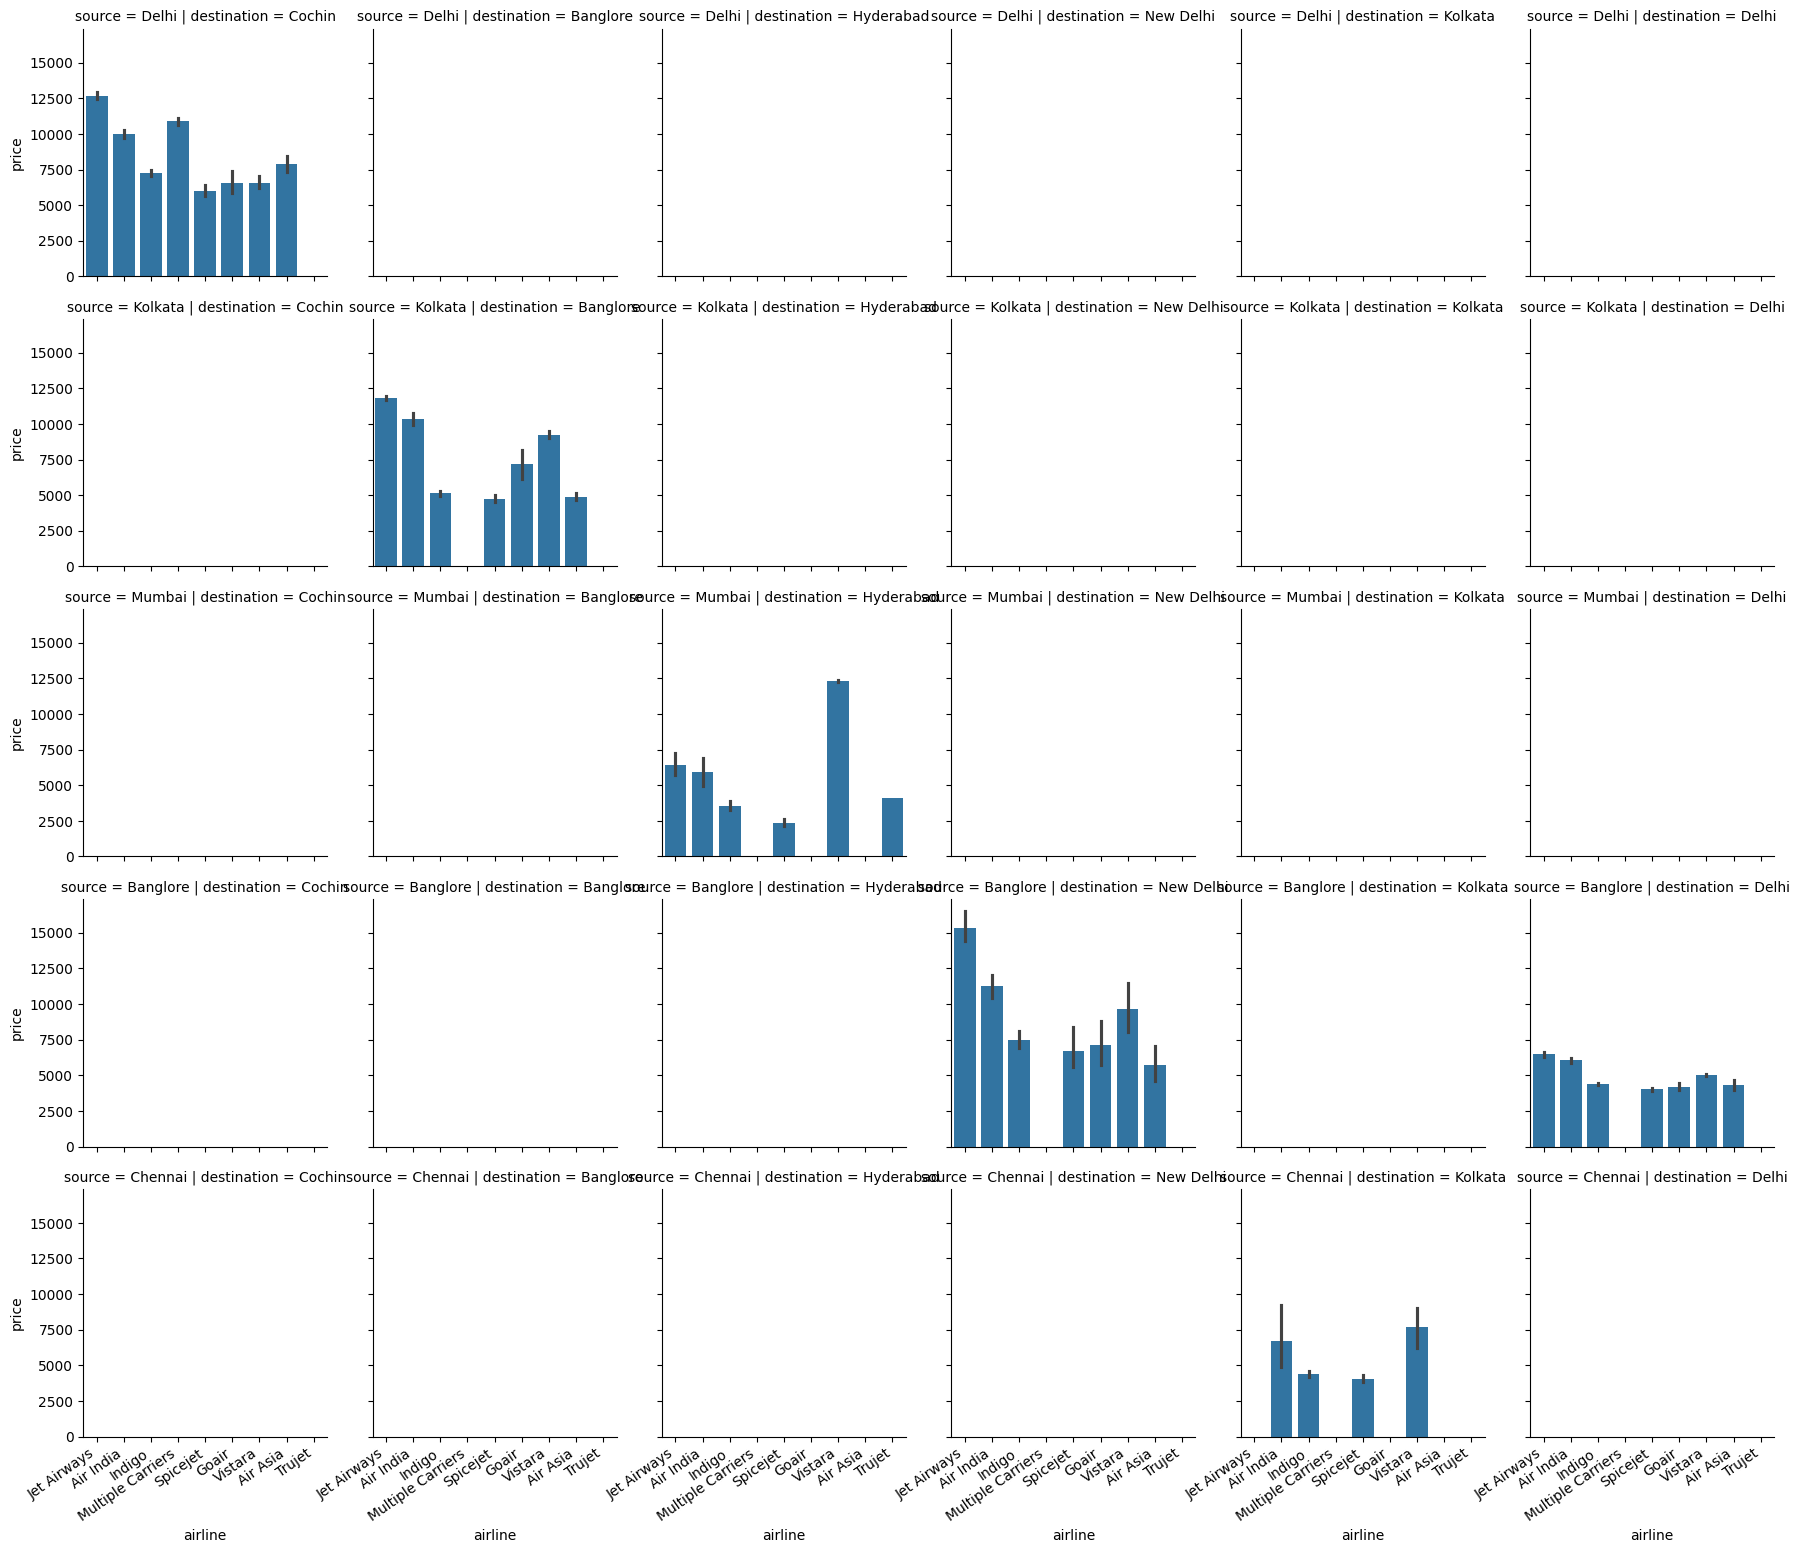

In [21]:
g = sns.FacetGrid(data = train,col = 'destination',row = 'source')#,row = 'source',hue = 'total_stops')
g.map(sns.barplot,'airline','price')
for ax in g.axes[4,:]:
    ehf.rotate_xlabels(ax)

### 8.2 Date Of Journey

In [22]:
train.date_of_journey

0      2019-05-27
1      2019-06-12
2      2019-05-18
3      2019-06-03
4      2019-04-01
          ...    
6689   2019-06-09
6690   2019-05-09
6691   2019-05-18
6692   2019-05-18
6693   2019-04-09
Name: date_of_journey, Length: 6694, dtype: datetime64[ns]

In [23]:
train.date_of_journey.describe()

count                             6694
mean     2019-05-04 11:43:39.061846528
min                2019-03-01 00:00:00
25%                2019-03-27 00:00:00
50%                2019-05-15 00:00:00
75%                2019-06-06 00:00:00
max                2019-06-27 00:00:00
Name: date_of_journey, dtype: object

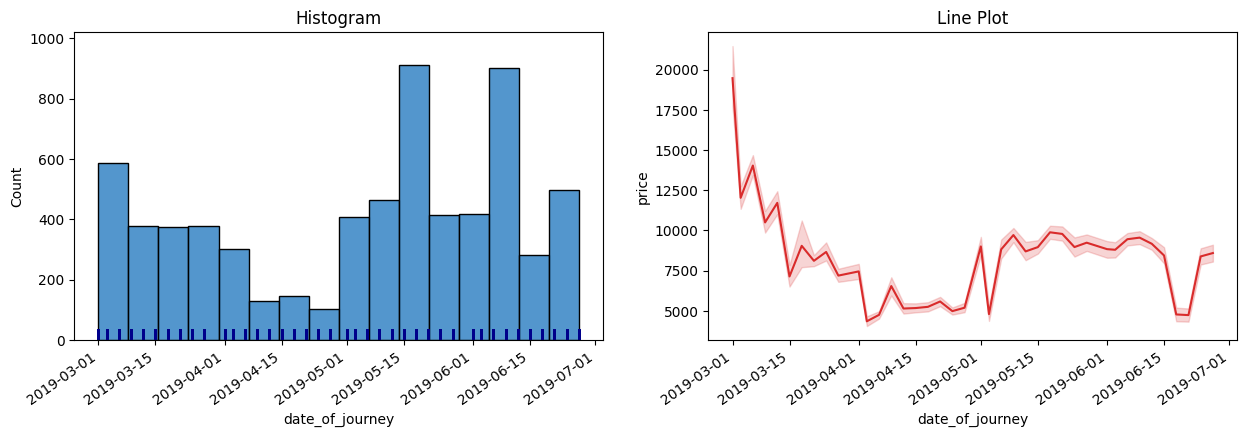

In [25]:
ehf.dt_univar_plots(
    data = train,
    var = 'date_of_journey',
    target = 'price'
)

<Axes: xlabel='month'>

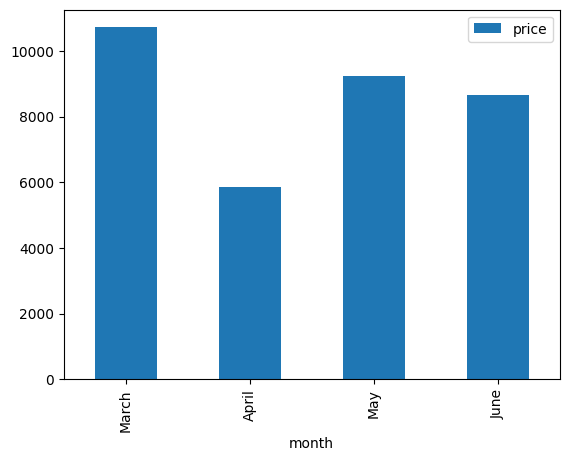

In [37]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq = 'M'))
    .price.mean()
    .to_frame()
    .set_axis(['March','April','May','June'],axis = 0)
    .rename_axis(index = 'month')
    .plot(
        kind = 'bar'
    )
)

<Axes: xlabel='week'>

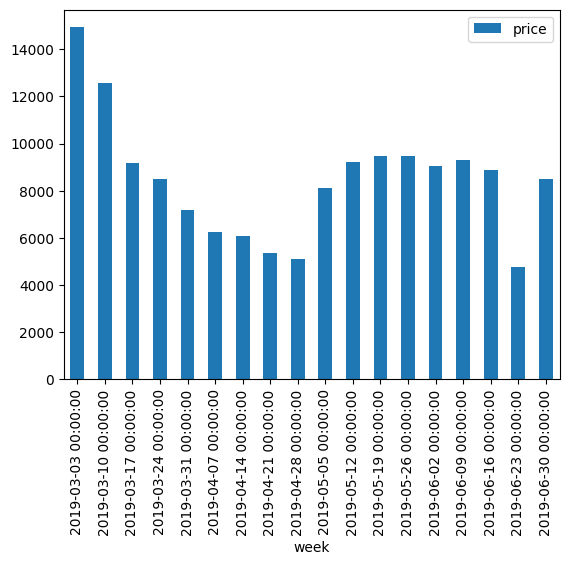

In [40]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq = 'W'))
    .price.mean()
    .to_frame()
    # .set_axis(['March','April','May','June'],axis = 0)
    .rename_axis(index = 'week')
    .plot(
        kind = 'bar'
    )
)

<Axes: xlabel='month'>

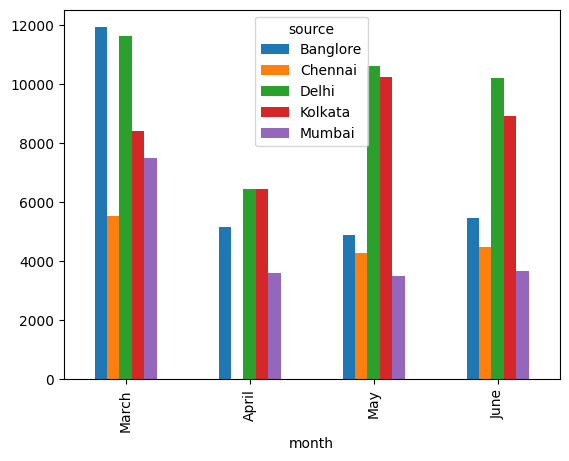

In [50]:
(
    train
    .groupby([pd.Grouper(key = 'date_of_journey',freq = 'M'),'source'])
    .price.mean()
    .unstack(fill_value = 0)
    .set_axis(["March", "April", "May", "June"])
    .rename_axis(index = 'month')
    .plot(
        kind = 'bar'
    )
)

### 8.3 dep_time

In [51]:
train.dep_time

0      2024-07-09 20:55:00
1      2024-07-09 18:55:00
2      2024-07-09 09:45:00
3      2024-07-09 21:20:00
4      2024-07-09 02:55:00
               ...        
6689   2024-07-09 11:35:00
6690   2024-07-09 10:00:00
6691   2024-07-09 12:00:00
6692   2024-07-09 07:55:00
6693   2024-07-09 08:00:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

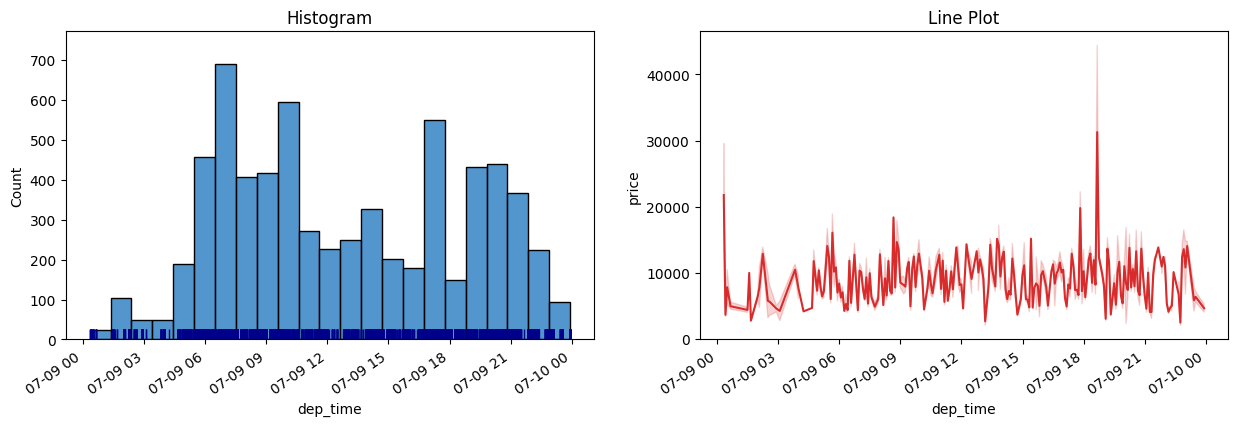

In [53]:
ehf.dt_univar_plots(train,'dep_time','price')

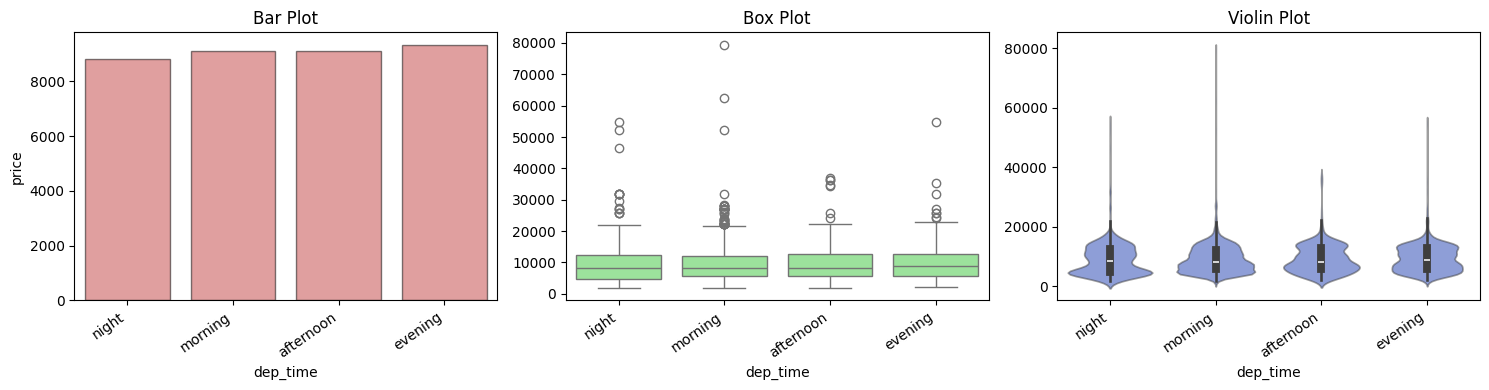

In [56]:
(
    train
    .assign(dep_time = lambda df_ : (
        np.select([
            df_.dep_time.dt.hour.between(4,12,inclusive = 'left'),
            df_.dep_time.dt.hour.between(12,16,inclusive = 'left'),
            df_.dep_time.dt.hour.between(16,20,inclusive = 'left')
            ],
            [
                 'morning',
                'afternoon',
                'evening'
            ]
               , default = 'night')
    ))
    .pipe(ehf.num_cat_bivar_plots,'price','dep_time')
)

### 8.4 arrival time

In [58]:
train['arrival_time']

0      2024-07-09 12:35:00
1      2024-07-09 16:20:00
2      2024-07-09 09:25:00
3      2024-07-09 22:50:00
4      2024-07-09 04:20:00
               ...        
6689   2024-07-09 18:50:00
6690   2024-07-09 01:30:00
6691   2024-07-09 07:40:00
6692   2024-07-09 13:25:00
6693   2024-07-09 19:00:00
Name: arrival_time, Length: 6694, dtype: datetime64[ns]

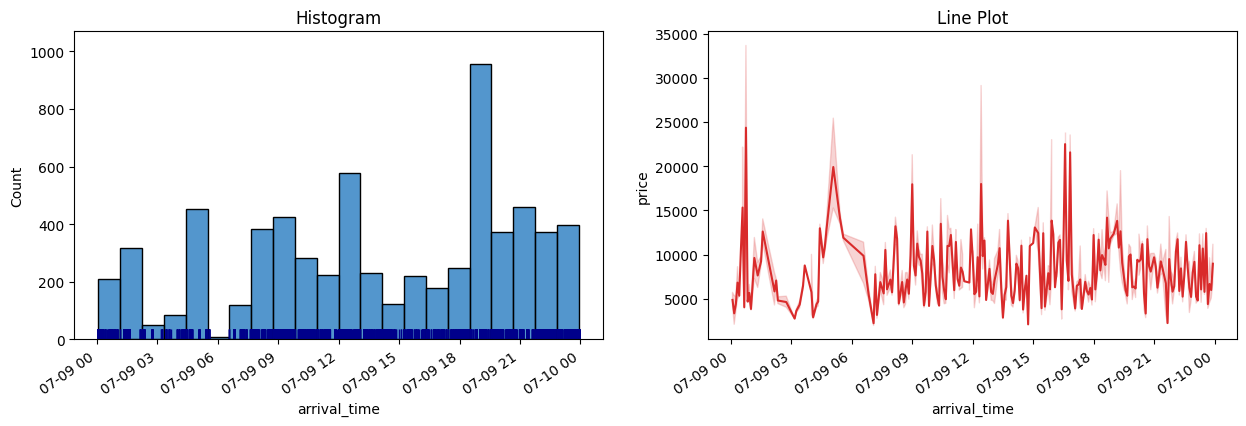

In [60]:
ehf.dt_univar_plots(train,'arrival_time','price')

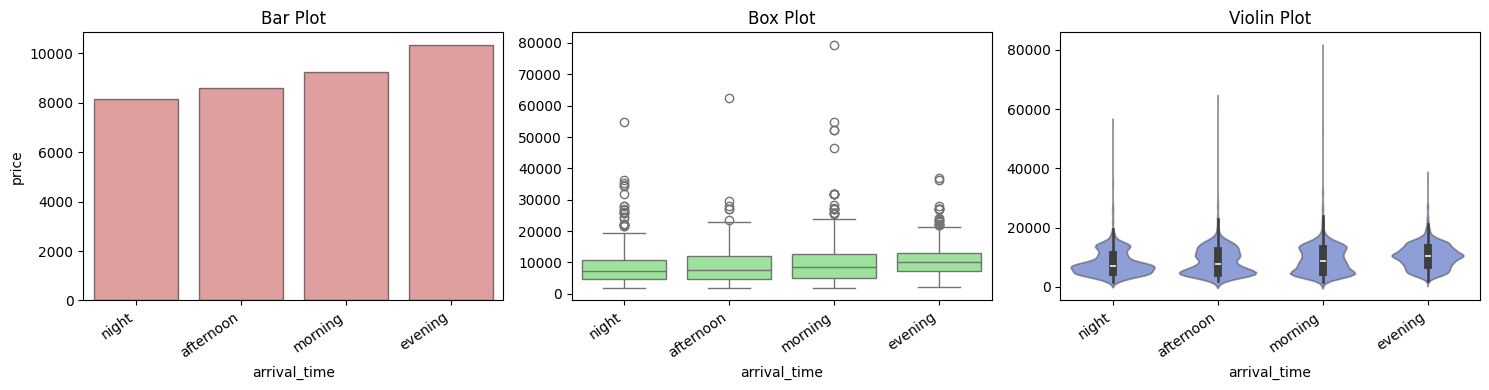

In [62]:
(
    train
    .assign(arrival_time = lambda df_ : (
        np.select([
            df_.arrival_time.dt.hour.between(4,12,inclusive = 'left'),
            df_.arrival_time.dt.hour.between(12,16,inclusive = 'left'),
            df_.arrival_time.dt.hour.between(16,20,inclusive = 'left')
            ],
            [
                 'morning',
                'afternoon',
                'evening'
            ]
               , default = 'night')
    ))
    .pipe(ehf.num_cat_bivar_plots,'price','arrival_time')
)

### 8.5 duration

In [64]:
train.duration

0        940
1       1285
2       1420
3         90
4         85
        ... 
6689     435
6690     930
6691    1180
6692     330
6693     660
Name: duration, Length: 6694, dtype: int64

In [65]:
ehf.num_summary(train,'duration')

0        940
1       1285
2       1420
3         90
4         85
        ... 
6689     435
6690     930
6691    1180
6692     330
6693     660
Name: duration, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,515.00
75,925.00
90,1443.50
95,1596.75
99,1925.00


,value
mean,637.633702
trimmed mean (5%),603.744607
trimmed mean (10%),575.500373
median,515.000000


,value
var,254415.264879
std,504.395941
IQR,755.000000
mad,345.000000
coef_variance,0.791043


,value
skewness,0.902919
kurtosis,-0.006774


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8882866501808167
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 242.1831336451669
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [67]:
ehf.num_num_hyp_testing(train,'duration','price')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.48835802027266445
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6859367616306481
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


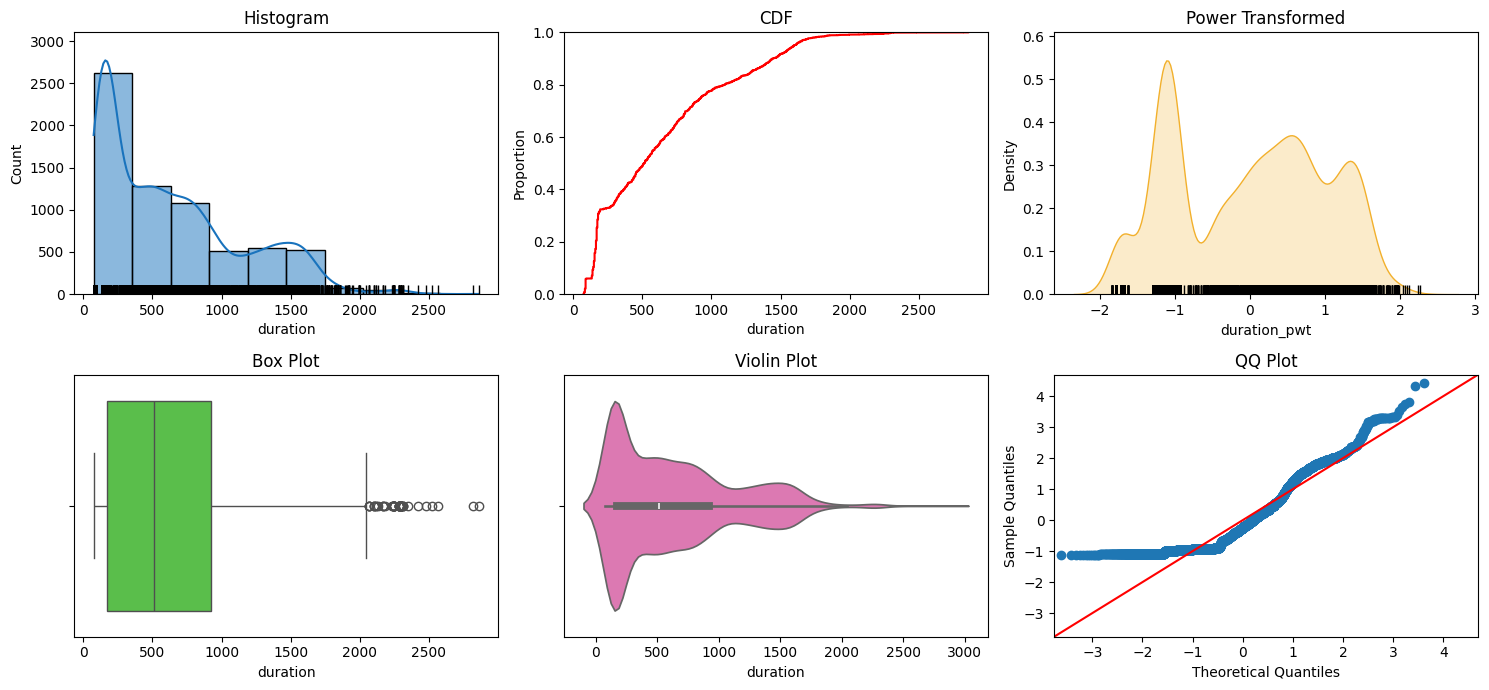

In [68]:
ehf.num_univar_plots(train,'duration')

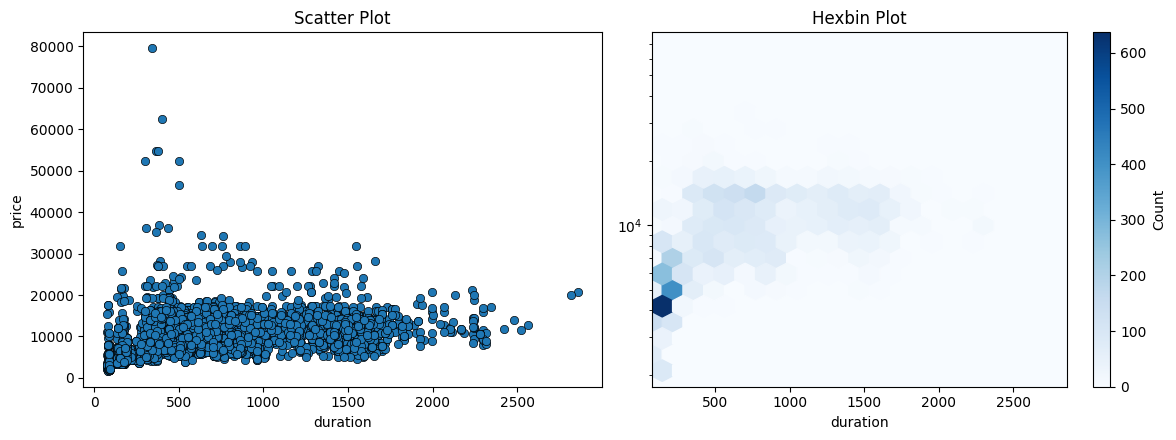

In [72]:
ehf.num_bivar_plots(
    train,
    'duration',
    'price',
    hexbin_kwargs = dict(
        yscale = 'log',
        gridsize = 20,
        cmap = 'Blues'
    )
)